In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import sqlalchemy as sa

from ingester3.config import source_db_path
from views_dataviz import ContinuousCriticismPlot, ContinuousCriticismMap

In [2]:
n = 100
np.random.seed(1962)

mock = pd.DataFrame(
    {
        "y_true": np.random.uniform(-100, 100, 100),
        "y_pred_a": np.random.uniform(-100, 100, 100),
        "y_pred_b": np.random.uniform(0, 1, n),
        "lab": [f"ID{i}" for i in range(100)],
    }
)

### ContinuousCriticismPlot

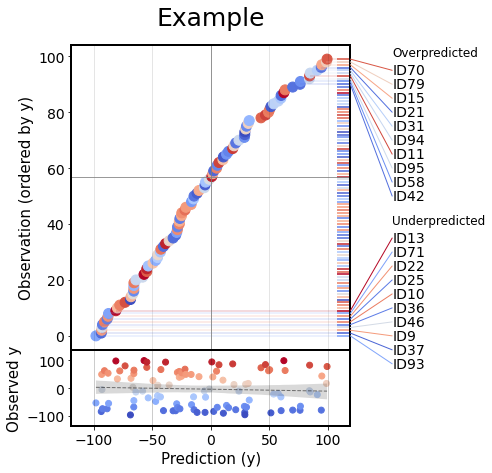

In [3]:
plot_single = ContinuousCriticismPlot(
    df=mock,
    y_pred="y_pred_a",
    y_true="y_true",
    lab="lab",
    notation="y",
    figsize=(5, 7),
    title="Example",
    titlesize=25,
    labelsize=15,
    y_margin=0.05,
    x_margin=0.2,
    ticksize=14,
    annotsize=14,
    n_worst=10
)

### ContinuousCriticismMap

You can also plot it with a map, which takes a few more parameters:

In [4]:
engine = sa.create_engine(source_db_path)
gdf = gpd.GeoDataFrame.from_postgis(
    "SELECT id as pg_id, geom FROM prod.priogrid WHERE in_africa=true", 
    engine, 
    geom_col='geom'
)
gdf_c = gpd.GeoDataFrame.from_postgis(
    "SELECT id as country_id, geom FROM prod.country WHERE in_africa=1", 
    engine, 
    geom_col='geom'
)
gdf = gdf.sort_values(by="pg_id")

In [5]:
n = 100
np.random.seed(1962)

mock = pd.DataFrame(
    {
        "y_true": np.random.uniform(-100, 100, 100),
        "y_pred_a": np.random.uniform(-100, 100, 100),
        "y_pred_b": np.random.uniform(0, 1, n),
        "lab": [f"ID{i}" for i in range(100)],
        "pg_id": np.random.choice(gdf.pg_id, 100),
    }
)

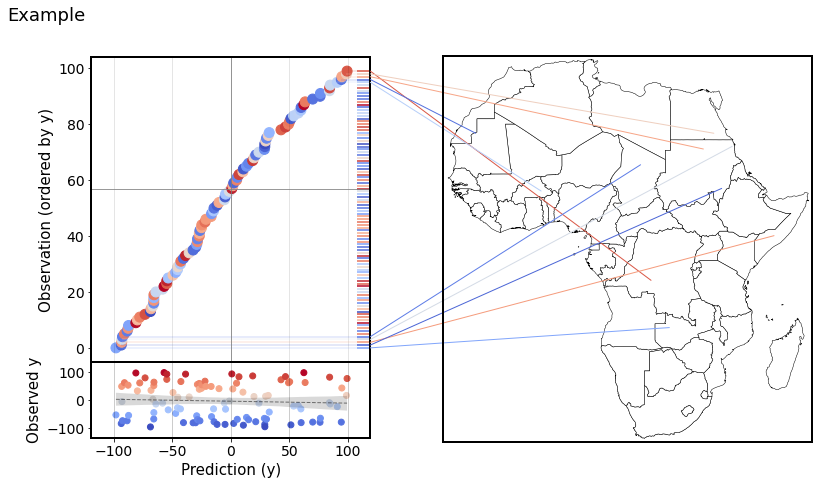

In [6]:
plot_with_map = ContinuousCriticismMap(
    df=mock, 
    y_true="y_true", 
    y_pred="y_pred_a", 
    lab="pg_id",
    title="Example",
    map_kwargs={"bbox": "africa"},
    mc_kwargs={
        "n_worst": 5,
        "titlesize": 25,
        "labelsize": 15,
        "y_margin": 0.05,
        "x_margin": 0.2,
        "ticksize": 14,
        "annotsize": 14,
        "cmap": "coolwarm",
    },
).plot_map_layer(
    gdf=gdf_c,  
    color="white",
    edgecolor="black",
    linewidth=0.5,
    suppress_colorbar=True,
    suppress_textbox=True,
).connect(gdf)